# **Primer punto: Modelo de Clasificación**

In [8]:
import warnings
warnings.filterwarnings('ignore')
import mglearn
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
from pypalettes import load_cmap
from matplotlib.colors import ListedColormap
import warnings
import squarify
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from pandas import DataFrame, crosstab
from statsmodels.stats.outliers_influence import variance_inflation_factor
from multiprocessing import Pool
from pickle import load, dump
from numpy import fill_diagonal, triu, ones, zeros
from scipy.stats import chi2_contingency
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier
from sklearn.svm import SVC
import pickle

Para realizar el ejercicio de modelos de clasificación utilizaremos un dataset que contiene información sobre la satisfacción de clientes.

## **Descripción de los datos**

Desde los equipos de soporte hasta los directivos, la satisfacción del cliente es una medida clave del
éxito. Los clientes insatisfechos no permanecen con la empresa y, en la mayoría de los casos, no expresan
su insatisfacción antes de irse. Una entidad financiera requiere identificar clientes insatisfechos al inicio de
su relación con la entidad. Esto permitiría tomar medidas proactivas para mejorar la experiencia del cliente
antes de que sea demasiado tarde. Debido a la sensibilidad, las variables son anonimizadas para predecir si
un cliente está satisfecho o insatisfecho con su experiencia en la entidad financiera.

A continuación, comenzaremos con el desarrollo del ejercicio.

importamos la base de datos con el nombre train.

In [20]:
train = pd.read_csv(r'C:\Users\Usuario\Pictures\TercerParcial_ML\train.csv')

#### **Número de observaciones**

In [21]:
train.shape

(76020, 371)

El dataset de train cuenta con 76.020 de oservaciones, y con 371 columnas.


In [22]:
column_types = train.dtypes
type_counts = column_types.value_counts()
print(type_counts)

int64      260
float64    111
Name: count, dtype: int64


Luego de realizar el conteo del tipo de variables que contiene nuestro dataset podemos observar que contiene un total de 260 variables enteras y 111 variables tipo float.

A continuación, se obtuvo una vista previa de las primeras 10 observaciones del dataset **train**.

In [ ]:
train.head(10)

#### **Media, mediana, mínimo, máximo, cuartiles, desviación estandar**

In [24]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


En la tabla anterior proporciona el resumen estadístico. Podemos encontrar el total, la media, desviación estandar, mínimos, máximos, cuartiles, de las variables de nuestro dataset.

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


#### **Datos Faltantes**

In [26]:
any_missing_overall = train.isna().any().any()
print(any_missing_overall)

False


In [27]:
porcentaje_faltantes = train.isnull().mean() * 100
porcentaje_faltantes

ID                         0.0
var3                       0.0
var15                      0.0
imp_ent_var16_ult1         0.0
imp_op_var39_comer_ult1    0.0
                          ... 
saldo_medio_var44_hace3    0.0
saldo_medio_var44_ult1     0.0
saldo_medio_var44_ult3     0.0
var38                      0.0
TARGET                     0.0
Length: 371, dtype: float64

Realizammos el respectivo análisis para conocer si el dataset contiene datos faltantes. Obtuvimos que el porcentaje de los missingvalues de las variables es de 0%, por lo tanto, se puede concluir que en nuestro dataset no contamos con datos faltantes.

Además, podemos confirmar esto de manera visual, con ayuda de un heatmap.

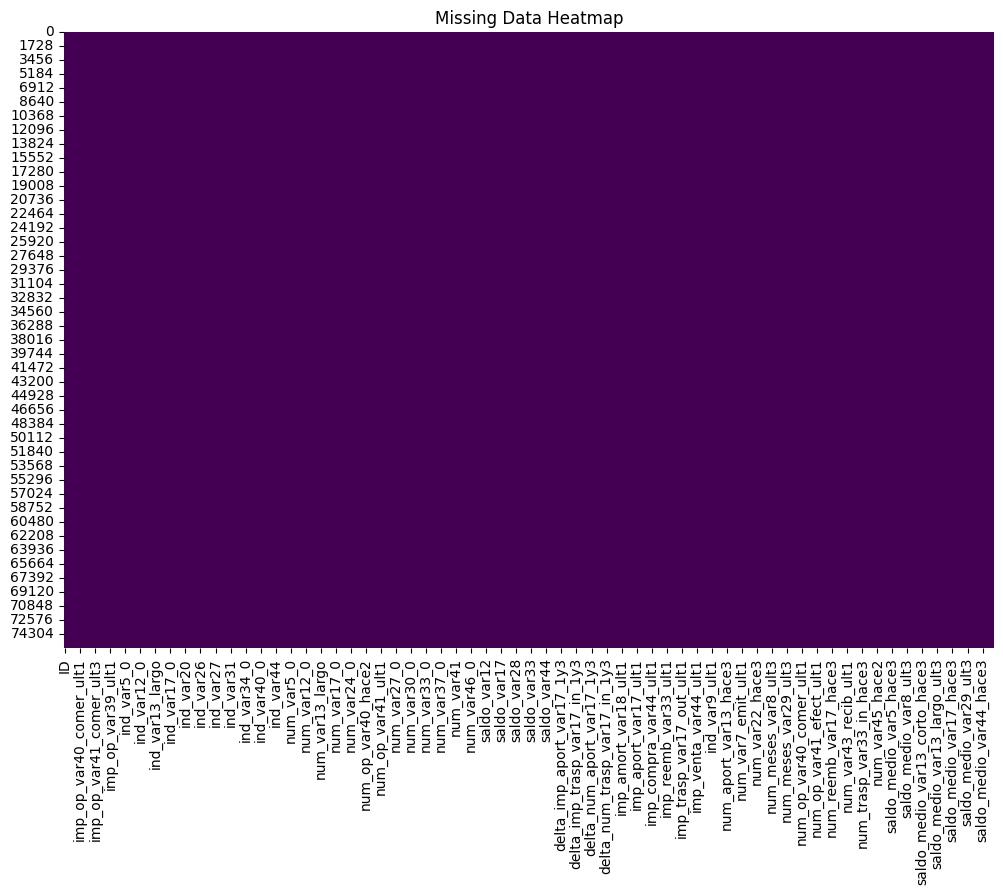

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

Aquí observamos algunos nombre de las columnas de dataset **train**.

In [30]:
for column in train.columns:
    print(column)

ID
var3
var15
imp_ent_var16_ult1
imp_op_var39_comer_ult1
imp_op_var39_comer_ult3
imp_op_var40_comer_ult1
imp_op_var40_comer_ult3
imp_op_var40_efect_ult1
imp_op_var40_efect_ult3
imp_op_var40_ult1
imp_op_var41_comer_ult1
imp_op_var41_comer_ult3
imp_op_var41_efect_ult1
imp_op_var41_efect_ult3
imp_op_var41_ult1
imp_op_var39_efect_ult1
imp_op_var39_efect_ult3
imp_op_var39_ult1
imp_sal_var16_ult1
ind_var1_0
ind_var1
ind_var2_0
ind_var2
ind_var5_0
ind_var5
ind_var6_0
ind_var6
ind_var8_0
ind_var8
ind_var12_0
ind_var12
ind_var13_0
ind_var13_corto_0
ind_var13_corto
ind_var13_largo_0
ind_var13_largo
ind_var13_medio_0
ind_var13_medio
ind_var13
ind_var14_0
ind_var14
ind_var17_0
ind_var17
ind_var18_0
ind_var18
ind_var19
ind_var20_0
ind_var20
ind_var24_0
ind_var24
ind_var25_cte
ind_var26_0
ind_var26_cte
ind_var26
ind_var25_0
ind_var25
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var29_0
ind_var29
ind_var30_0
ind_var30
ind_var31_0
ind_var31
ind_var32_cte
ind_var32_0
ind_var32
ind_var33_0
ind_var33


Obtuvimos el número de algunas variables específicamente para conocer más a detalle que tipo de datos contienen.

In [31]:
cantidad = train['var15'].value_counts()
print(cantidad)

var15
23     20170
24      6232
25      4217
26      3270
27      2861
       ...  
97         3
104        2
98         1
105        1
101        1
Name: count, Length: 100, dtype: int64


In [32]:
cantidad = train['var3'].value_counts()
print(cantidad)

var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: count, Length: 208, dtype: int64


In [33]:
cantidad = train['TARGET'].value_counts()
print(cantidad)

TARGET
0    73012
1     3008
Name: count, dtype: int64


Observamos que en nuestra variable respuesta hay desbalance en las clases, siendo la clase 0 la que tiene mayor número de observaciones. Por lo que más adelante, para la implementación de los modelos, será necesario utilizar alguna tecnica de balanceo de clases.

## **Gráficas**

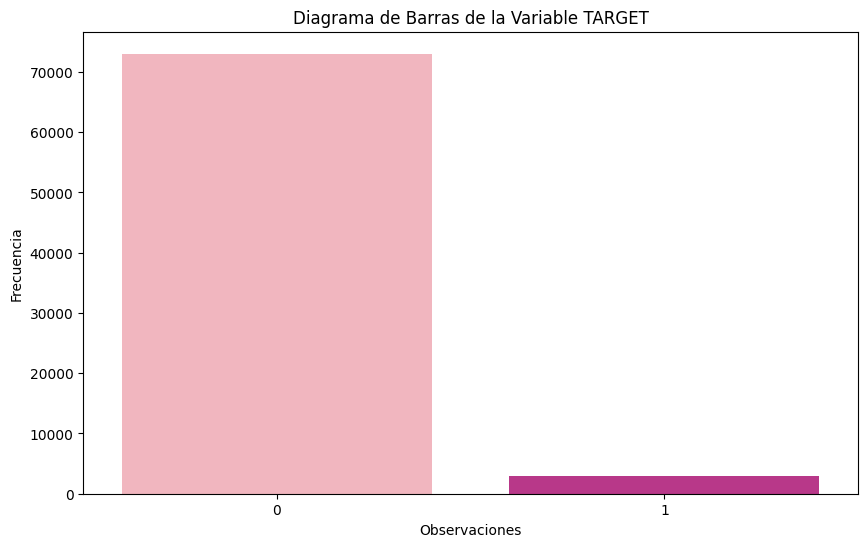

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TARGET', data=train, palette='RdPu')  # Cambia 'TARGET' por el nombre exacto de tu variable
plt.title("Diagrama de Barras de la Variable TARGET")
plt.xlabel("Observaciones")
plt.ylabel("Frecuencia")
plt.show()

Al analizar la distribución de la variable **TARGET**, que es la variable de interés, se observa una clara desproporción en las observaciones. La categoría 0 tiene un número significativamente mayor de registros, con un total de 73,012 observaciones, mientras que la categoría 1 está representada por solo 3,008 observaciones. Esta distribución sugiere un desequilibrio en las clases, lo que podría afectar los resultados de los modelos de clasificación. Es importante tener en cuenta este desbalance al seleccionar y ajustar los modelos para asegurar una correcta evaluación y predicción.

Para realizar este ejercicio, se tomaron 10 variables del dataset para observar como se comportan las variables y que tipo de información contienen.

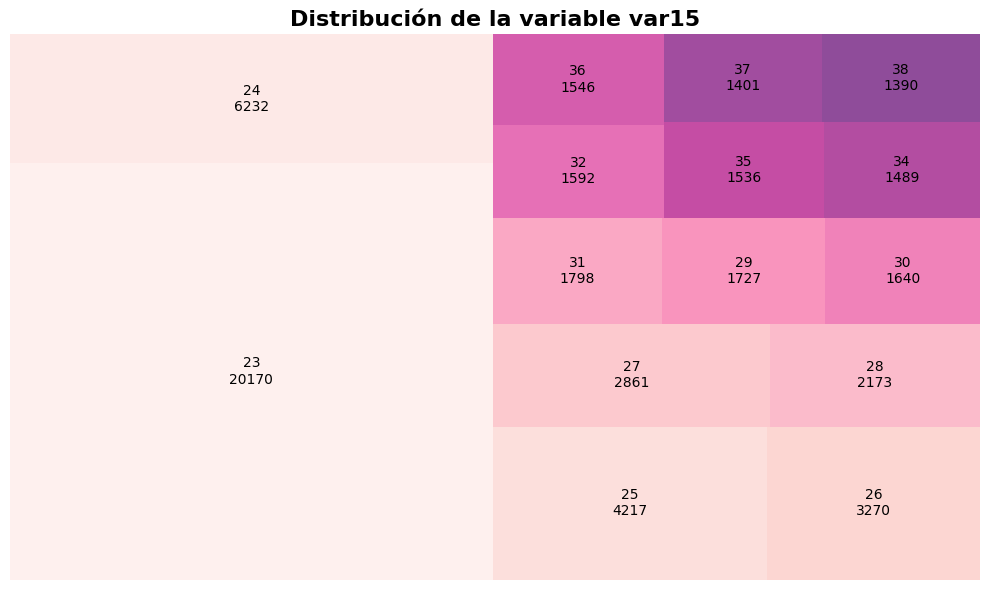

In [35]:
var15 = train['var15'].value_counts()
top_15 = var15.head(15)
values = top_15.values
labels = [f'{cell}\n{count}' for cell, count in zip(top_15.index, top_15.values)]
colors = sns.color_palette("RdPu", len(values))
# Crear el gráfico
plt.figure(figsize=(10, 6))
squarify.plot(sizes=values, label=labels, color=colors, alpha=0.7)
# Configuración del gráfico
plt.axis("off")
plt.title("Distribución de la variable var15", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Para la variable **var15**, la gráfica anterior muestra qué observación presenta la tendencia más destacada. Podemos ver que la categoría 23 tiene un total de 20,170 observaciones, siendo así la categoría con el mayor número de registros en esta variable.

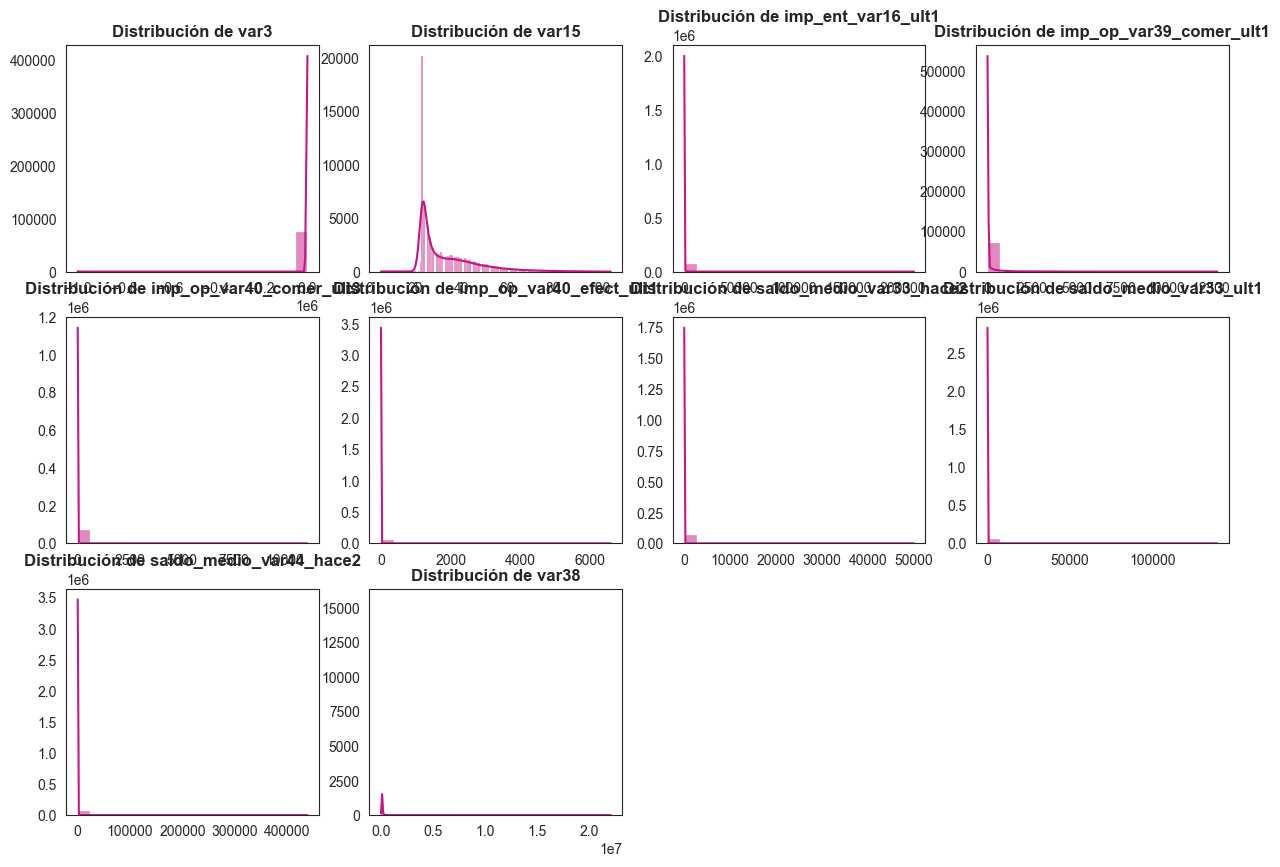

In [36]:
color = '#C71585'
sns.set_style("white")

variables = ['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
             'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
             'saldo_medio_var33_hace2', 'saldo_medio_var33_ult1',
             'saldo_medio_var44_hace2', 'var38']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 4, i)
    sns.histplot(train[var], kde=True, color=color)
    plt.title(f'Distribución de {var}', fontsize=12, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('')

plt.show()


En la gráfica anterior, se muestra una serie de visualizaciones que permite observar el tipo de distribución de las 10 variables seleccionadas para el análisis. Visualmente, ninguna de estas distribuciones parece ajustarse a una distribución normal. En particular, la distribución de la variable **var15** destaca por ser ligeramente diferente a las demás; sin embargo, sigue sin mostrar características propias de una distribución normal.

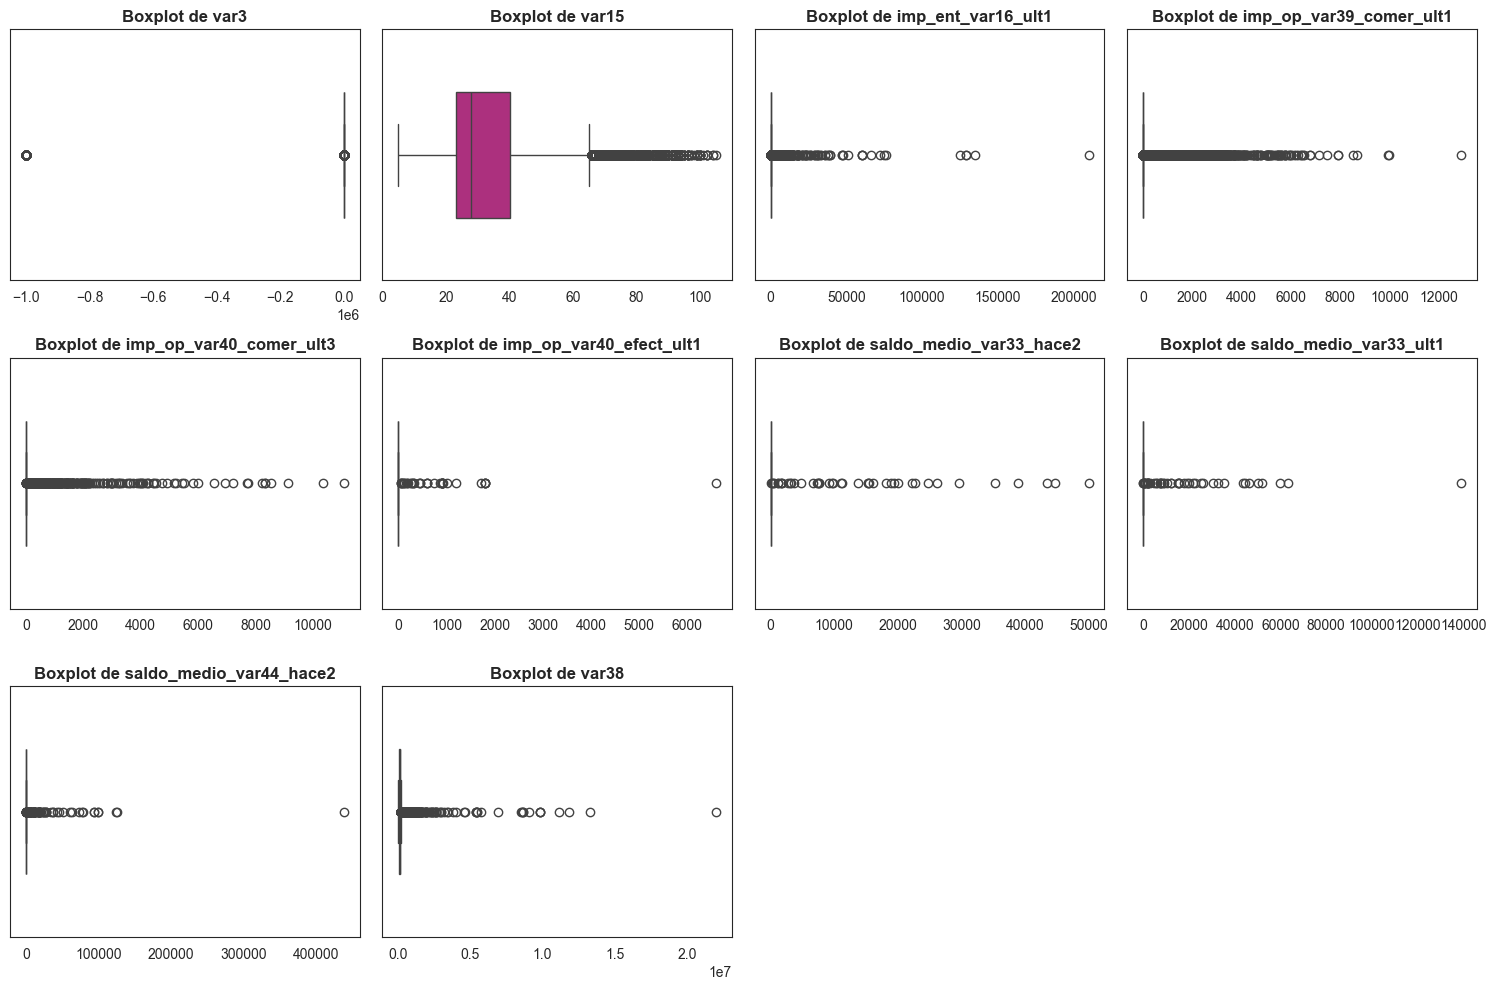

In [37]:
color = '#C71585'
sns.set_style("white") 
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=train[var], color=color, saturation=0.7, width=0.5)
    plt.title(f'Boxplot de {var}', fontsize=12, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


Además, utilizamos diagramas de caja para identificar posibles valores atípicos en las variables. Observamos que todas las gráficas presentan datos atípicos y que las cajas tienen una distribución muy limitada, lo cual sugiere que estas variables no siguen una distribución normal, ya que la caja se concentra en un único valor. Sin embargo, como se ha mencionado en análisis anteriores, la variable **var15** es la única que presenta una caja más clara en el gráfico, permitiendo observar la mediana, los valores mínimos y máximos, así como los datos atípicos.

Cabe resaltar, que en este ejercicio no se contaba con el contexto de cada variable en particular, por lo tanto, no fue necesario realizar imputación de datos faltantes.

### **Correlación y multicolinealidad**

Realizamos la matriz de correlación para saber que variables estan correlacionadas y proceder con la respectiva reducción de dimensionalidad.

In [38]:
correlation_matrix = train.corr()
correlation_matrix

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,1.000000,-0.001025,-0.002135,-0.003111,-0.001436,-0.004131,-0.007277,-0.006302,-0.006700,-0.006698,...,0.001986,0.003771,-0.001521,-0.001216,-0.003772,-0.003674,-0.000856,0.000297,-0.005687,0.003148
var3,-0.001025,1.000000,-0.004452,0.001868,0.005989,0.006817,0.001518,0.001690,0.000530,0.000611,...,0.000716,0.000491,0.000638,0.000669,0.000617,0.000508,0.000738,0.000778,0.000071,0.004475
var15,-0.002135,-0.004452,1.000000,0.043722,0.094762,0.101177,0.042754,0.048512,0.008805,0.009678,...,0.029358,0.017264,0.028504,0.029176,0.029180,0.018884,0.032833,0.033597,0.006497,0.101322
imp_ent_var16_ult1,-0.003111,0.001868,0.043722,1.000000,0.041221,0.034879,0.009896,0.009377,0.000592,0.002510,...,-0.000864,-0.000632,-0.000548,-0.000540,0.002655,-0.000612,0.005055,0.006590,0.000007,-0.000017
imp_op_var39_comer_ult1,-0.001436,0.005989,0.094762,0.041221,1.000000,0.886476,0.342709,0.295295,0.032280,0.054809,...,0.016422,0.011719,0.012570,0.013703,0.009445,0.005532,0.011665,0.010802,0.012546,0.010353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,-0.003674,0.000508,0.018884,-0.000612,0.005532,0.006359,-0.000480,-0.000529,-0.000170,-0.000195,...,-0.000219,-0.000151,-0.000196,-0.000205,0.332172,1.000000,0.229158,0.213191,0.003646,-0.002553
saldo_medio_var44_ult1,-0.000856,0.000738,0.032833,0.005055,0.011665,0.010660,-0.000254,-0.000510,-0.000254,-0.000292,...,0.000819,-0.000225,0.002493,0.002205,0.818300,0.229158,1.000000,0.968167,0.003258,-0.003104
saldo_medio_var44_ult3,0.000297,0.000778,0.033597,0.006590,0.010802,0.009822,-0.000372,-0.000601,-0.000268,-0.000308,...,0.000977,-0.000238,0.002905,0.002574,0.710593,0.213191,0.968167,1.000000,0.003037,-0.003015
var38,-0.005687,0.000071,0.006497,0.000007,0.012546,0.013271,0.016628,0.015584,-0.000315,0.000682,...,0.004448,0.001605,0.004255,0.004290,0.002889,0.003646,0.003258,0.003037,1.000000,-0.019510


Además, también realizamos un mapa de calor en donde podemos analizar de manera visual que variables tienen correlación alta. Es importante aclarar que en esta gráfica solo se visualizó una parte de las variables para mayor comodidad al momento del análisis.

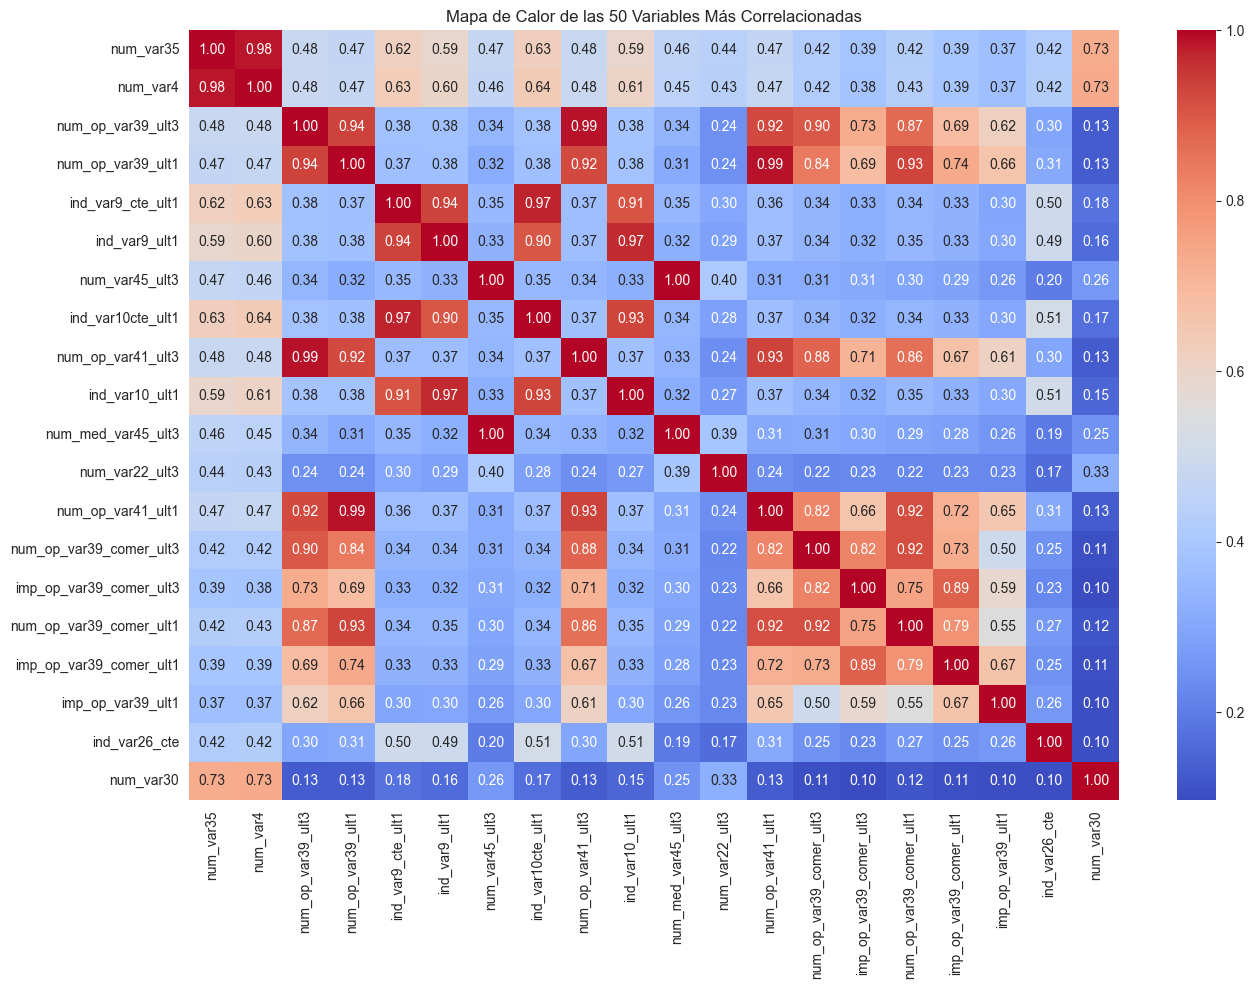

In [39]:
correlacion = train.corr().abs()
correlacion_total = correlacion.sum().sort_values(ascending=False)
top_20_variables = correlacion_total.head(20).index
correlacion_top_20 = train[top_20_variables].corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 10))
sns.heatmap(correlacion_top_20, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Mapa de Calor de las 50 Variables Más Correlacionadas")
plt.show()

Es importante análizar estas correlaciones mediante las gráficas de regresión, ya que, nos permite observar si estás variables pueden o no estar correlacionas, aunque, esto solo se sabe cuando se realiza la matriz de correlación.

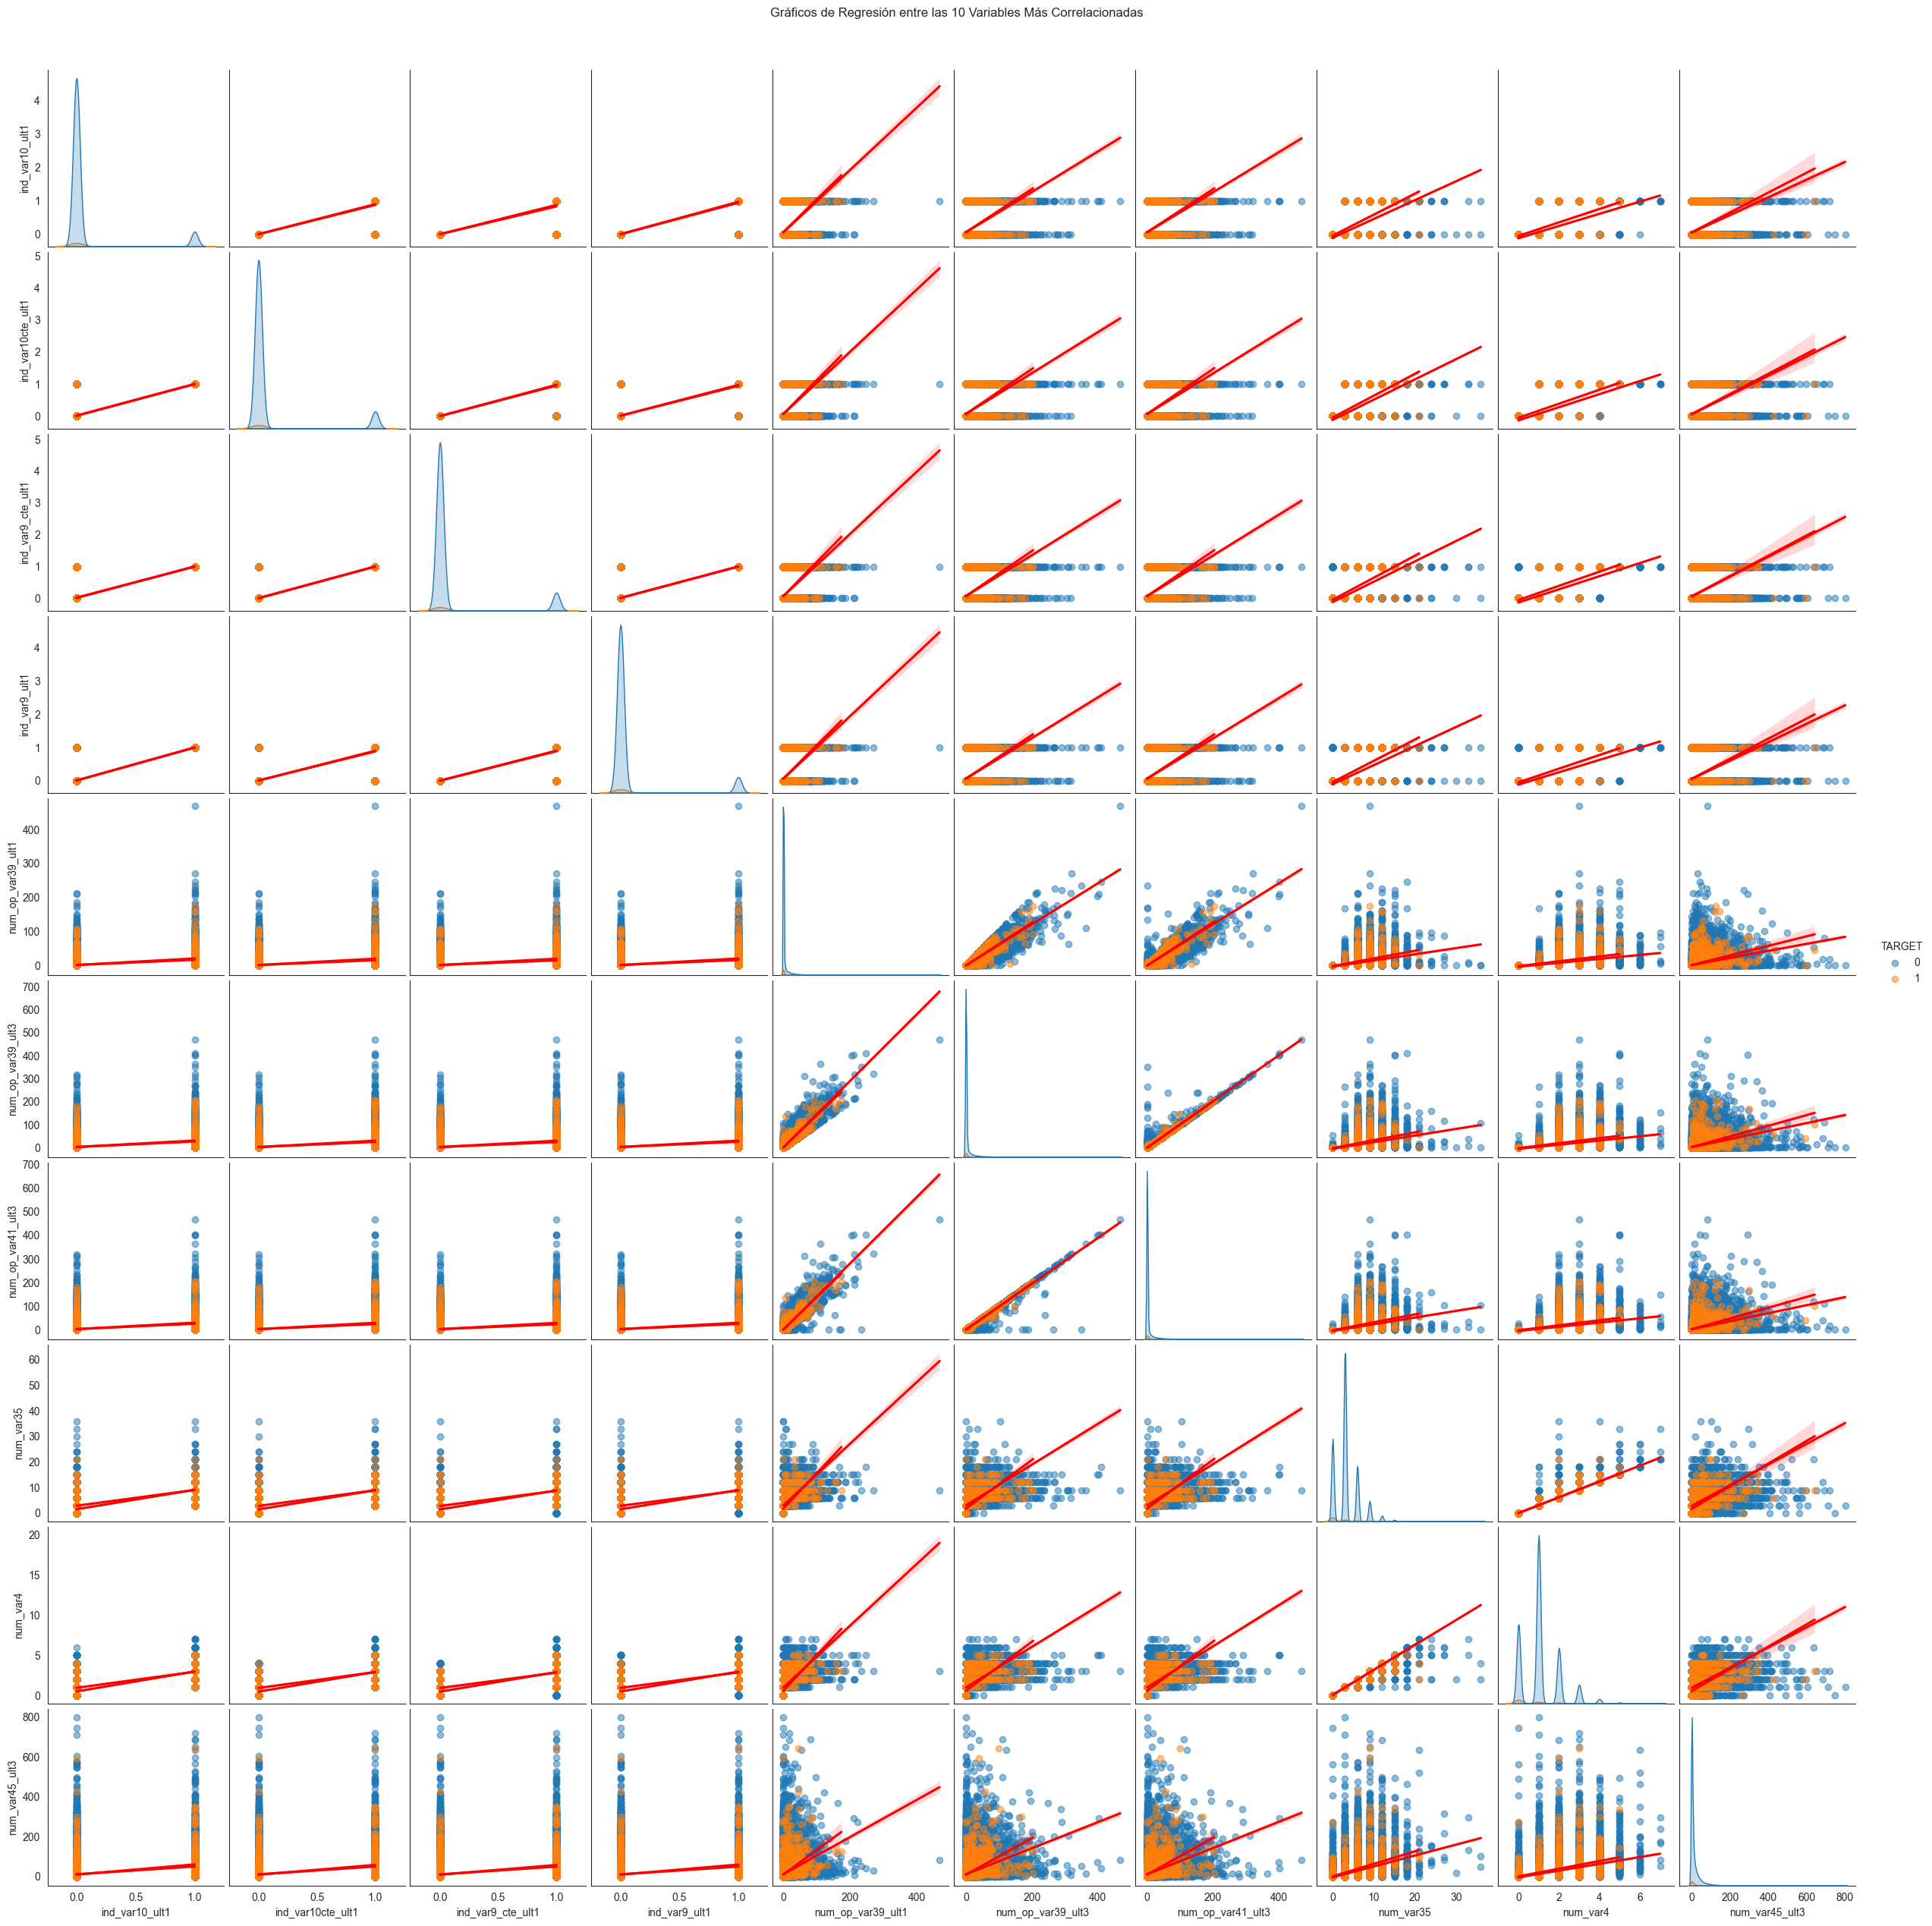

In [40]:
top_10_variables = correlacion_total.head(10).index

# Crear el gráfico de pairplot con regresión y hue
pairplot = sns.pairplot(train[top_10_variables.union(['TARGET'])], hue="TARGET", kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'alpha':0.5}} )
pairplot.fig.suptitle("Gráficos de Regresión entre las 10 Variables Más Correlacionadas", y=1.02)
plt.show()

### **Reducción de multicolinealidad**

Como científicos de datos, hemos diseñado un enfoque para reducir la dimensionalidad mediante la eliminación de variables que presentan correlaciones **superiores a 0.7**, las cuales son identificadas en la matriz de correlación. De esta manera, nos aseguramos de que no haya variables que estén altamente relacionadas entre sí, lo que podría generar redundancia y afectar negativamente los resultados del análisis. Este proceso ayuda a mantener solo una variable representativa de cada grupo de variables correlacionadas, reduciendo la multicolinealidad y mejorando la eficiencia y la interpretabilidad del modelo.

In [41]:
threshold = 0.7
mask = (correlation_matrix.abs() > threshold)

# Encontrar columnas a eliminar
to_drop = set()

for column in mask.columns:
    if column not in to_drop:
        correlated_columns = mask[column]
        if correlated_columns.sum() > 1: 
            to_drop.update(correlated_columns[correlated_columns].index)
cleaned_correlation_matrix = correlation_matrix.drop(columns=to_drop, axis=1).drop(index=to_drop, axis=0)
print(cleaned_correlation_matrix)

                               ID      var3     var15  imp_ent_var16_ult1  \
ID                       1.000000 -0.001025 -0.002135           -0.003111   
var3                    -0.001025  1.000000 -0.004452            0.001868   
var15                   -0.002135 -0.004452  1.000000            0.043722   
imp_ent_var16_ult1      -0.003111  0.001868  0.043722            1.000000   
imp_sal_var16_ult1      -0.006793  0.000460  0.013525           -0.000053   
...                           ...       ...       ...                 ...   
saldo_medio_var29_hace3  0.000137  0.000143 -0.002859           -0.000194   
saldo_medio_var33_hace3  0.003771  0.000491  0.017264           -0.000632   
saldo_medio_var44_hace3 -0.003674  0.000508  0.018884           -0.000612   
var38                   -0.005687  0.000071  0.006497            0.000007   
TARGET                   0.003148  0.004475  0.101322           -0.000017   

                         imp_sal_var16_ult1  ind_var2_0  ind_var2  ind_var1

Realizamos nuevamente el mapa de calor, y podemos observar que las variables que antes aparecían con alta correlación ya no se encuentran en el dataset, y en esta gráfica solo se aprecian aquellas variables que no estan correlacionadas entre si o no tiene una correlación significativa.

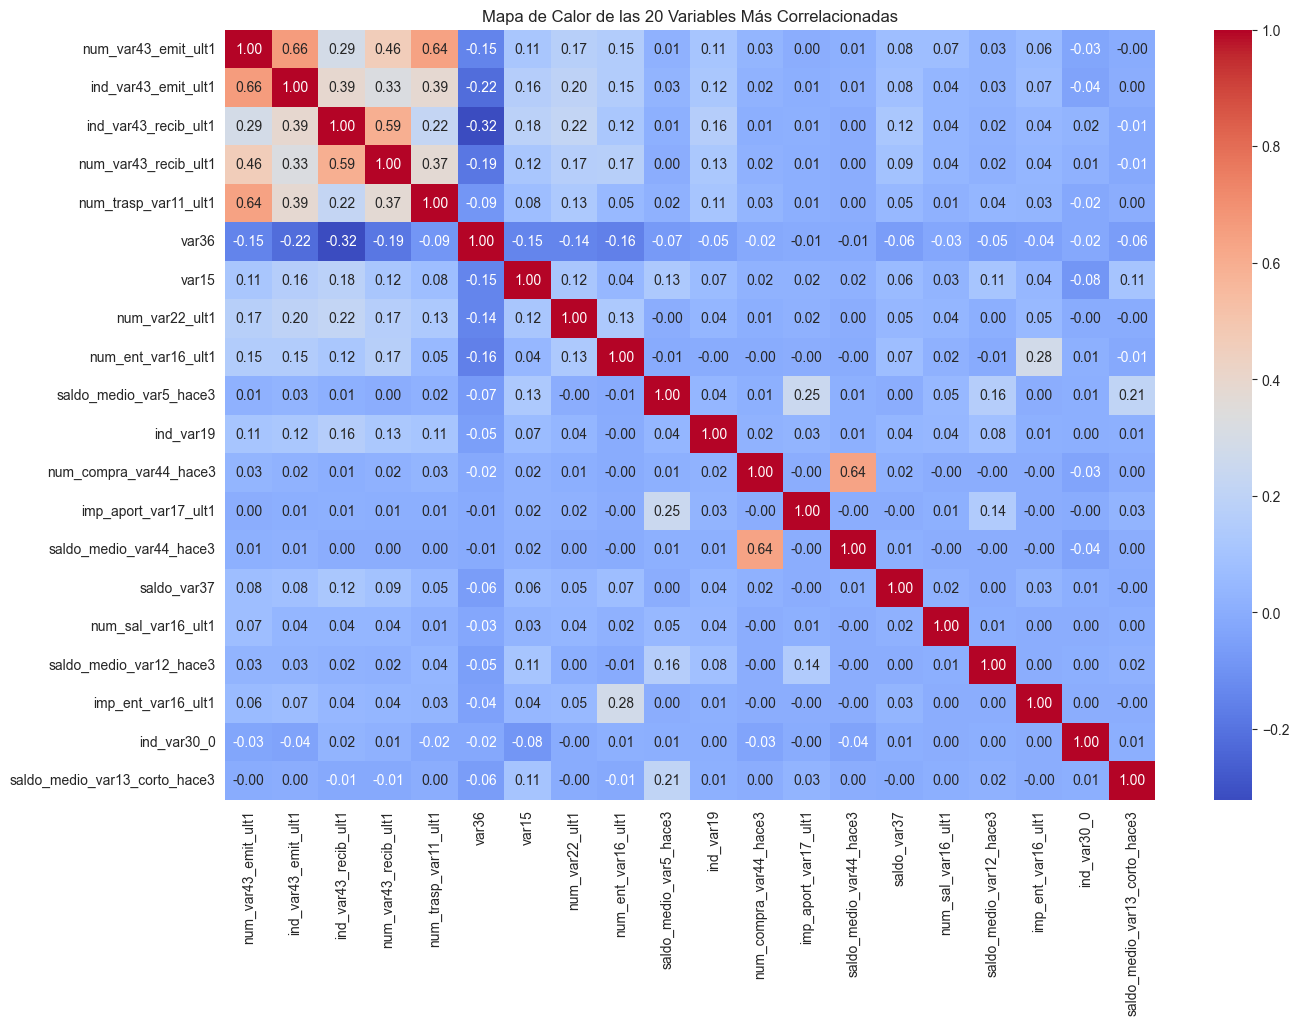

In [42]:
correlacion_total = cleaned_correlation_matrix.abs().sum().sort_values(ascending=False)
top_20_variables = correlacion_total.head(20).index
top_20_correlation_matrix = cleaned_correlation_matrix.loc[top_20_variables, top_20_variables]

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 10))
# Crear el mapa de calor para las 20 variables más importantes
sns.heatmap(top_20_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
# Configurar el título del gráfico
plt.title("Mapa de Calor de las 20 Variables Más Correlacionadas")
plt.show()

Guardamos el resultado obtenido luego de la eliminación en un nuevo dataframe que nos ayudará más adelante con el entrenamiento de los modelos.

In [43]:
variables_remaining = cleaned_correlation_matrix.columns
df_remaining_variables = pd.DataFrame(variables_remaining, columns=['Variables'])
filtered_train= train[variables_remaining]
filtered_train

,ID,var3,var15,imp_ent_var16_ult1,imp_sal_var16_ult1,ind_var2_0,ind_var2,ind_var19,ind_var27_0,ind_var28_0,...,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace3,saldo_medio_var13_medio_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var33_hace3,saldo_medio_var44_hace3,var38,TARGET
0,1,2,23,0.0,0.0,0,0,0,0,0,...,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0,0,0,0,0,...,0.0,122.22,0.0,0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0,0,0,0,0,...,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,0.0,0,0,0,0,0,...,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0,0,0,0,0,...,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0,0,0,0,0,...,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0,0,0,0,0,...,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0,0,0,0,0,...,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0,0,0,0,0,...,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,84278.160000,0


También se realizaron diagramas de dispersión, los cuales son fundamentales para confirmar visualmente que las variables no están correlacionadas entre sí. Estas gráficas permiten observar las relaciones entre cada par de variables.

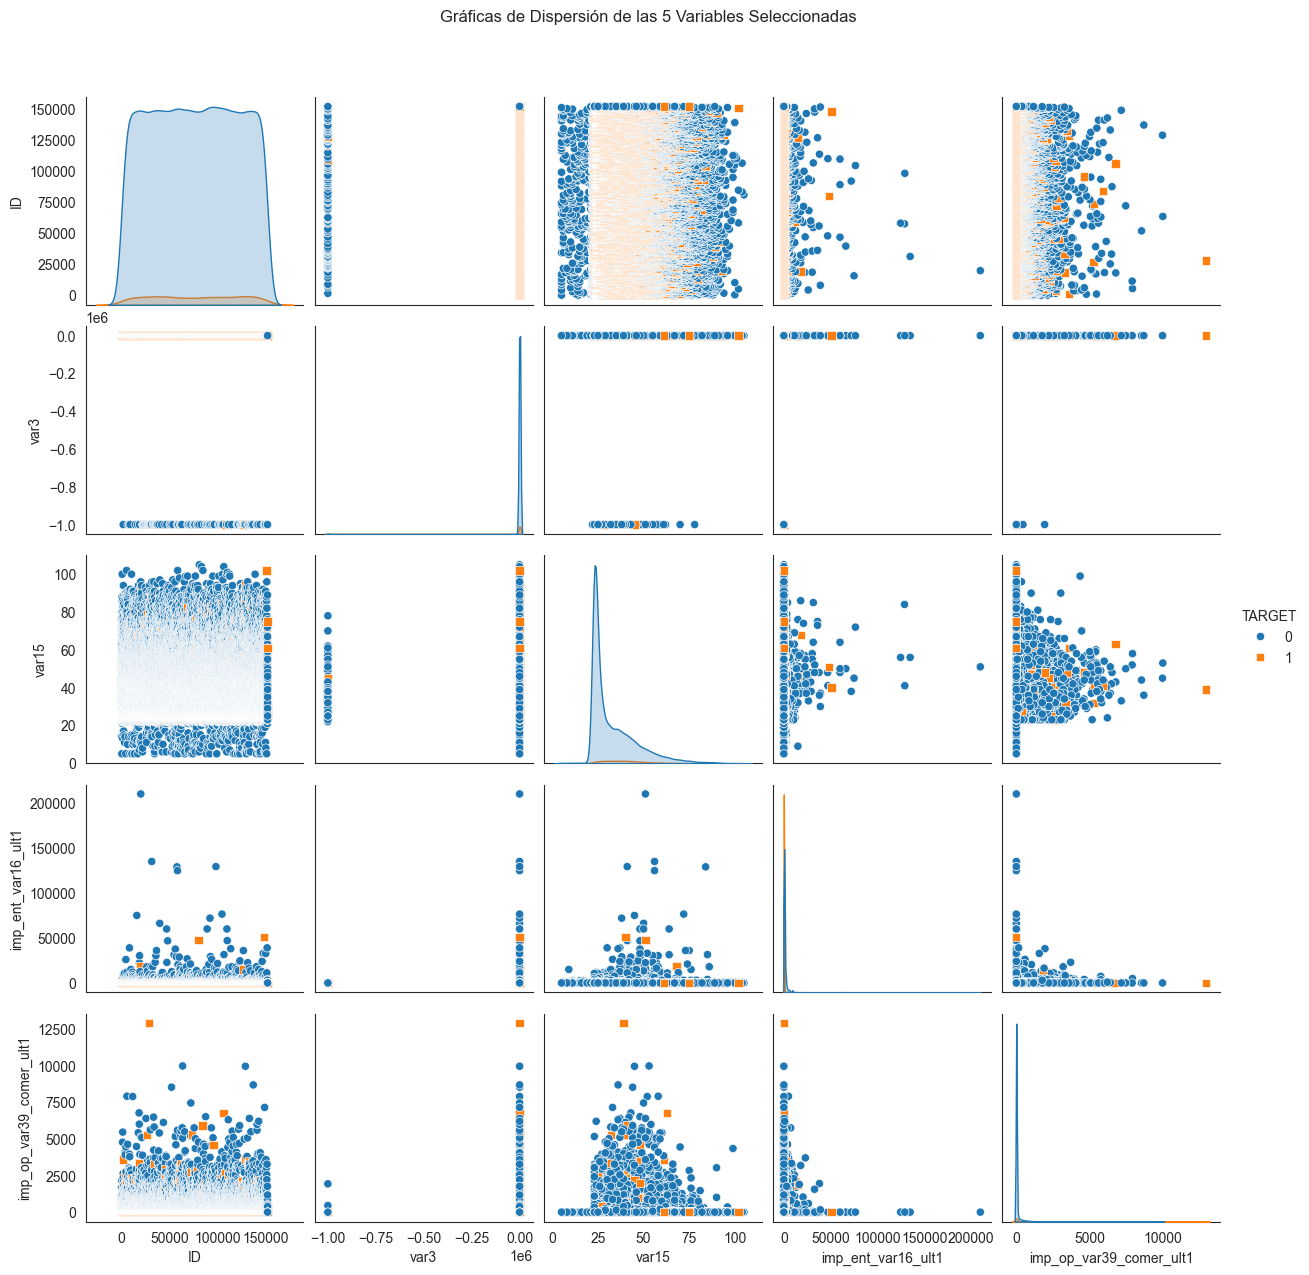

In [44]:
selected_columns = train.select_dtypes(include=['float64', 'int64']).columns[:5]
df_selected = train[selected_columns]
df_selected['TARGET'] = train['TARGET'] 
pairplot = sns.pairplot(df_selected, hue='TARGET', diag_kind='kde', markers=["o", "s", "D"])
pairplot.fig.suptitle("Gráficas de Dispersión de las 5 Variables Seleccionadas", y=1.02)
pairplot.fig.subplots_adjust(top=0.95) 

plt.show()

Podemos observar que despues de la eliminación de multicolinealidad, las variables visualmente no presentan correlación entre si.

## **Datos filtrados**

Importamos nuestra base de datos luego de la reducción de variables altamente correlacionadas.

In [2]:
filtertrain = pd.read_csv(r'C:\Users\Usuario\Pictures\TercerParcial_ML\filtered_train.csv')

In [8]:
filtertrain.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_sal_var16_ult1,ind_var2_0,ind_var2,ind_var19,ind_var27_0,ind_var28_0,...,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace3,saldo_medio_var13_medio_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var33_hace3,saldo_medio_var44_hace3,var38,TARGET
0,1,2,23,0.0,0.0,0,0,0,0,0,...,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0,0,0,0,0,...,0.0,122.22,0.0,0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0,0,0,0,0,...,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,0.0,0,0,0,0,0,...,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0,0,0,0,0,...,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,117310.979016,0


# **Modelos**

In [3]:
X=filtertrain.drop(columns='TARGET')
y=filtertrain['TARGET']

### **Adasyn**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [5]:
adasyn = ADASYN(random_state=21)
X_new_train, y_new_train = adasyn.fit_resample(X_train, y_train)
x_new_test, y_new_test = adasyn.fit_resample(X_test,y_test)

In [ ]:
X_new_train.shape, y_new_train.shape

((117906, 69), (117906,))

In [20]:
x_new_test.shape, y_new_test.shape

((29169, 69), (29169,))

Usaramos la métrica AUC, ya que, es ideal para evaluar este tipo de ejercicios que buscan distinguir entre la clase 0 y la clase 1, lo que garantiza que los modelos tengan un buen desempeño para este tipo de implementación.

## **KNN**

In [6]:
pipeline_knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
param_grid_knn = [{
    'knn__n_neighbors': range(1, 15),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2] 
}]

k_fold_knn = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)

grid_search_k = GridSearchCV(pipeline_knn, param_grid_knn, cv=k_fold_knn, scoring='roc_auc', n_jobs=-1)

grid_search_k.fit(X_new_train, y_new_train)

best_parameters_knn = grid_search_k.best_params_
best_score_knn = grid_search_k.best_score_

# Predicciones en el conjunto de test
model_pred_knn = grid_search_k.predict(x_new_test)
prob_knn = grid_search_k.predict_proba(x_new_test)[:, 1]

# Calcular la precisión en el conjunto de test
auc_test_knn = roc_auc_score(y_new_test, prob_knn)

print("Mejores parámetros: ", best_parameters_knn)
print("Mejor score de entrenamiento: ", best_score_knn)
print('Precisión en el conjunto de test: ', auc_test_knn)

Mejores parámetros:  {'knn__n_neighbors': 14, 'knn__p': 1, 'knn__weights': 'distance'}
Mejor score de entrenamiento:  0.9698432965528724
Precisión en el conjunto de test:  0.8894245925920354


In [ ]:
with open('mejor_modelo_knn.pkl', 'wb') as file:
    pickle.dump(grid_search_k, file)

In [24]:
tabla1 = {
    '': ['K-NN'],
    'Precisión': [
        precision_score(y_new_test, model_pred_knn, average='binary')
    ],
    'Recall': [
        recall_score(y_new_test, model_pred_knn, average='binary')
    ],
    'F1 Score': [
        f1_score(y_new_test, model_pred_knn, average='binary')
    ],
    'AUC': [
        roc_auc_score(y_new_test, prob_knn),  
    ]
}

tabla = pd.DataFrame(tabla1)
tabla

,,Precisión,Recall,F1 Score,AUC
0,K-NN,0.852974,0.778182,0.813863,0.889425


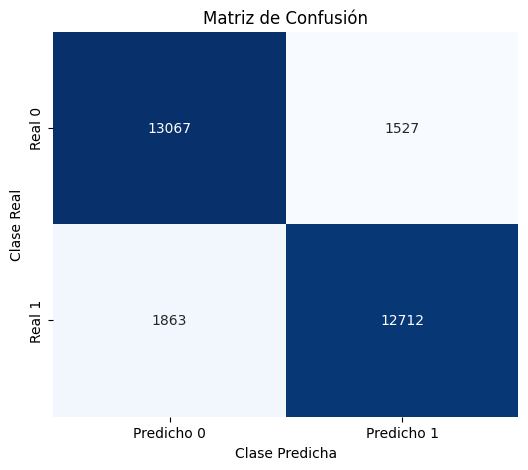

In [ ]:
from sklearn.metrics import confusion_matrix
# Calcular la matriz de confusión
conf_matrix_knn = confusion_matrix(y_new_test, model_pred_knn)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicho 0', 'Predicho 1'], yticklabels=['Real 0', 'Real 1'])

plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()

La matriz de confusión refleja un buen rendiemiento del modelo ya que se puede observar que identificó correctamente 13.067 clientes satisfechos y 12.712 clientes insatisfechos.

## **Clasificación bayesiana**

In [7]:
pipeline_cb = Pipeline([
    ('scaler', StandardScaler()),  # Escalador
    ('nb', BernoulliNB())          # Clasificador
])

param_grid_cb = {
    'nb__alpha': [0.1, 1, 10, 100]  # Parámetro de suavizado para BernoulliNB
}

# Configurar GridSearchCV
grid_search_cb = GridSearchCV(pipeline_cb, param_grid_cb, cv=5, scoring='roc_auc', verbose=1)
grid_search_cb.fit(X_new_train, y_new_train)

y_test_pred_cb = grid_search_cb.predict(x_new_test)
best_params_cb = grid_search_cb.best_params_
best_score_cb = grid_search_cb.best_score_
prob_cb = grid_search_cb.predict_proba(x_new_test)[:, 1]
test_auc_roc_cb = roc_auc_score(y_new_test, prob_cb)

print("Mejores parámetros:", best_params_cb)
print("Mejor puntaje en entrenamiento:", best_score_cb)
print("AUC-ROC en el conjunto de test:", test_auc_roc_cb)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Mejores parámetros: {'nb__alpha': 100}
Mejor puntaje en entrenamiento: 0.784343249712661
AUC-ROC en el conjunto de test: 0.7638358676031951


In [10]:
with open('mejor_modelo_cb.pkl', 'wb') as file:
    pickle.dump(grid_search_cb, file)

In [27]:
tabla2 = {
    '': ['Clasificación bayesiana'],
    'Precisión': [
        precision_score(y_new_test, y_test_pred_cb, average='binary')
    ],
    'Recall': [
        recall_score(y_new_test, y_test_pred_cb, average='binary')
    ],
    'F1 Score': [
        f1_score(y_new_test, y_test_pred_cb, average='binary')
    ],
    'AUC': [
        roc_auc_score(y_new_test, prob_cb),  
    ]
}

tabla_cb = pd.DataFrame(tabla2)
tabla_cb

,,Precisión,Recall,F1 Score,AUC
0,Clasificación bayesiana,0.688863,0.726106,0.706994,0.763836


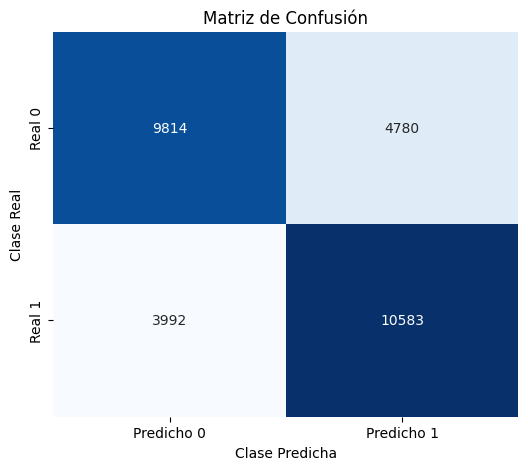

In [50]:
conf_matrix_cb = confusion_matrix(y_new_test, y_test_pred_cb)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_cb, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicho 0', 'Predicho 1'], yticklabels=['Real 0', 'Real 1'])

plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()

Al obsevar la gráfica anterior, podemos concluir que el modelo tiene un rendimiento aceptable, aunque vale resaltar que hay falsos negativos y falsos postivos que no está detectando. En general, detectó bien los clientes satisfechos e insatisfechos.

## **Regresión Logística**

### **L1**

In [11]:
pipeline_l1 = Pipeline([
    ('scaler', StandardScaler()), 
    ('logreg', LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000))
])

param_grid_l1 = [{
    'logreg__C': [0.01, 0.1, 1, 10, 100] 
}]

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)

grid_search_lr = GridSearchCV(pipeline_l1, param_grid_l1, cv=k_fold, scoring='roc_auc', n_jobs=-1)

grid_search_lr.fit(X_new_train, y_new_train)

best_parameters = grid_search_lr.best_params_
best_score = grid_search_lr.best_score_

model_pred_lr = grid_search_lr.predict(x_new_test)
prob_lr = grid_search_lr.predict_proba(x_new_test)[:, 1]

print("Mejores parámetros: ", best_parameters)
print("Mejor score de entrenamiento: ", best_score)
print('Score en el conjunto de test: ', roc_auc_score(y_new_test, prob_lr))

Mejores parámetros:  {'logreg__C': 100}
Mejor score de entrenamiento:  0.8144889576298491
Score en el conjunto de test:  0.7957372599139052


In [12]:
with open('mejor_modelo_logreg_l1.pkl', 'wb') as file:
    pickle.dump(grid_search_lr, file)

In [31]:
tablal1 = {
    '': ['Regresión Logistica L1'],
    'Precisión': [
        precision_score(y_new_test, model_pred_lr, average='binary')
    ],
    'Recall': [
        recall_score(y_new_test, model_pred_lr, average='binary')
    ],
    'F1 Score': [
        f1_score(y_new_test, model_pred_lr, average='binary')
    ],
    'AUC': [
        roc_auc_score(y_new_test, prob_lr),  
    ]
}

tabla_rl1 = pd.DataFrame(tablal1)
tabla_rl1

,,Precisión,Recall,F1 Score,AUC
0,Regresión Logistica L1,0.753786,0.765009,0.759356,0.795737


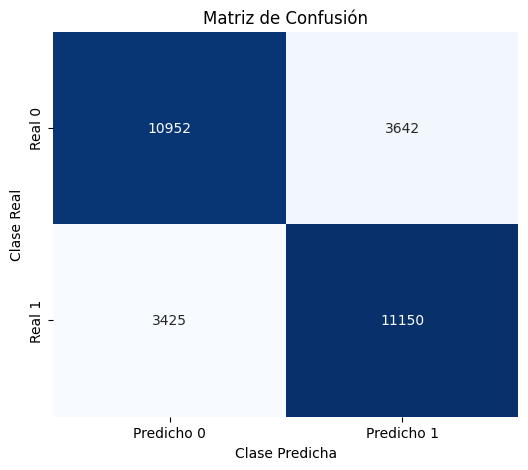

In [51]:
conf_matrix_l1 = confusion_matrix(y_new_test, model_pred_lr)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_l1, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicho 0', 'Predicho 1'], yticklabels=['Real 0', 'Real 1'])

plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()

Al igual que los anteriores modelos, el modelo de regresión logística con penalización L1 tiene una buena detección de los clientes satisfechos e insatisfechos. Sin embargo tambien tiene cierto margen de error.

### **L2**

In [13]:
model_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('logistic', LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000))
])

# Configurar el grid de parámetros para el modelo de regresión logística con L2
param_grid_l2 = [{
    'logistic__C': [0.01, 0.1, 1, 10, 100]
}]

# Configurar StratifiedKFold para validación cruzada
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)

# Configurar GridSearchCV
grid_search_model = GridSearchCV(model_pipeline, param_grid_l2, cv=cv_strategy, scoring='roc_auc', n_jobs=-1)

# Ajustar el modelo
grid_search_model.fit(X_new_train, y_new_train)

# Obtener mejores parámetros y puntuación
optimal_params = grid_search_model.best_params_
best_auc_score = grid_search_model.best_score_

# Predicciones en el conjunto de prueba
predictions = grid_search_model.predict(x_new_test)
probabilities = grid_search_model.predict_proba(x_new_test)[:, 1]

print("Mejores parámetros: ", optimal_params)
print("Mejor score de entrenamiento: ", best_auc_score)
print('Score en el conjunto de test: ', roc_auc_score(y_new_test, probabilities))

Mejores parámetros:  {'logistic__C': 100}
Mejor score de entrenamiento:  0.8144863019039652
Score en el conjunto de test:  0.7957502965926692


In [14]:
with open('mejor_modelo_logreg_l2.pkl', 'wb') as file:
    pickle.dump(grid_search_model, file)

In [34]:
tablal2 = {
    '': ['Regresión Logistica L2'],
    'Precisión': [
        precision_score(y_new_test, predictions, average='binary')
    ],
    'Recall': [
        recall_score(y_new_test, predictions, average='binary')
    ],
    'F1 Score': [
        f1_score(y_new_test, predictions, average='binary')
    ],
    'AUC': [
        roc_auc_score(y_new_test, probabilities),  
    ]
}

tabla_rl2 = pd.DataFrame(tablal2)
tabla_rl2

,,Precisión,Recall,F1 Score,AUC
0,Regresión Logistica L2,0.753871,0.76494,0.759365,0.79575


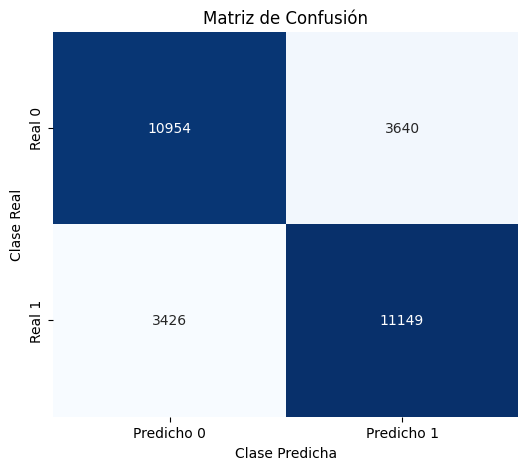

In [52]:
conf_matrix_l2 = confusion_matrix(y_new_test, predictions)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_l2, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicho 0', 'Predicho 1'], yticklabels=['Real 0', 'Real 1'])

plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()

Al analizar la grafica anterior, podemos concluir que el modelo tiene un buen rendiemiento general con altas predicciones correctas.

## **Random Forest**

In [15]:
pipeline_rf = ImbPipeline([
    ('scaler', StandardScaler()),
    ('forest', RandomForestClassifier(random_state=42))
])


param_grid_rf = {
    'forest__n_estimators': [50, 100, 200],
    'forest__max_depth': [10, 20, 30, 40],
}

cv_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=cv_rf, scoring='roc_auc', n_jobs=-1)

grid_search_rf.fit(X_new_train, y_new_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_


predictions_rf = grid_search_rf.predict(x_new_test)
probabilities_rf = grid_search_rf.predict_proba(x_new_test)[:, 1]

print("Mejores parámetros: ", best_params_rf)
print("Mejor score de entrenamiento: ", best_score_rf)
print('Score en el conjunto de test (AUC): ', roc_auc_score(y_new_test, probabilities_rf))

Mejores parámetros:  {'forest__max_depth': 40, 'forest__n_estimators': 200}
Mejor score de entrenamiento:  0.9863584108141612
Score en el conjunto de test (AUC):  0.9401914318509146


In [16]:
with open('mejor_modelo_rf.pkl', 'wb') as file:
    pickle.dump(grid_search_rf, file)

In [37]:
tablarf = {
    '': ['Random Forest'],
    'Precisión': [
        precision_score(y_new_test, predictions_rf, average='binary')
    ],
    'Recall': [
        recall_score(y_new_test, predictions_rf, average='binary')
    ],
    'F1 Score': [
        f1_score(y_new_test, predictions_rf, average='binary')
    ],
    'AUC': [
        roc_auc_score(y_new_test, probabilities_rf),  
    ]
}

tabla_modelrf = pd.DataFrame(tablarf)
tabla_modelrf

,,Precisión,Recall,F1 Score,AUC
0,Random Forest,0.914397,0.787856,0.846423,0.940191


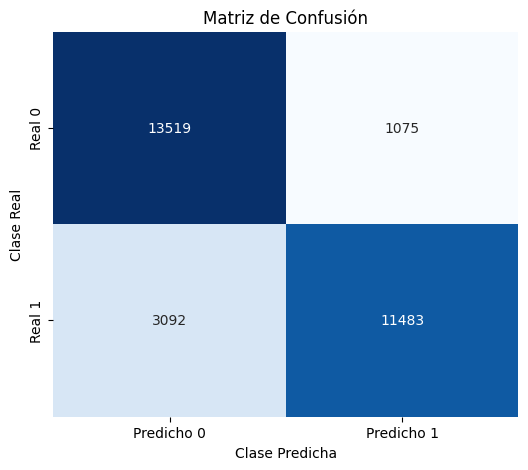

In [ ]:
conf_matrix_rf = confusion_matrix(y_new_test, predictions_rf)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicho 0', 'Predicho 1'], yticklabels=['Real 0', 'Real 1'])

plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()

El modelo Random Forest, también tiene alta capacidad de clasificación para ambas clases, con una proporción significativamente alta de acierto en comparación con los errores. 

## **XGboost**

In [17]:
xgb_pipeline = ImbPipeline([
    ('scaler', StandardScaler()), 
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=21))
])

xgb_paramgrid = {
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__max_depth': [3, 5, 7],
    'xgb__n_estimators': [50, 100, 200]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)
xgb_gridsearch = GridSearchCV(xgb_pipeline, param_grid=xgb_paramgrid, cv=skf, scoring='roc_auc', n_jobs=-1, verbose=2)
xgb_gridsearch.fit(X_new_train, y_new_train)

best_model_xg = xgb_gridsearch.best_estimator_
y_pred_xg = best_model_xg.predict(x_new_test)

print("Mejor score de entrenamiento:", xgb_gridsearch.best_score_)
print("Mejor parámetro:", xgb_gridsearch.best_params_)

y_pred_proba = xgb_gridsearch.best_estimator_.predict_proba(x_new_test)[:, 1]
auc_xg = roc_auc_score(y_new_test, y_pred_proba)
print("Mejor score de conjunto de prueba (AUC):", auc_xg)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejor score de entrenamiento: 0.9685540077743149
Mejor parámetro: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 200}
Mejor score de conjunto de prueba (AUC): 0.9502465121712887


In [18]:
with open('mejor_modelo_xg', 'wb') as file:
    pickle.dump(xgb_gridsearch, file)

In [42]:
tablaxg = {
    '': ['XGBoost'],
    'Precisión': [
        precision_score(y_new_test, y_pred_xg, average='binary')
    ],
    'Recall': [
        recall_score(y_new_test, y_pred_xg, average='binary')
    ],
    'F1 Score': [
        f1_score(y_new_test, y_pred_xg, average='binary')
    ],
    'AUC': [
        roc_auc_score(y_new_test, y_pred_proba),  
    ]
}

tabla_boost = pd.DataFrame(tablaxg)
tabla_boost

,,Precisión,Recall,F1 Score,AUC
0,XGBoost,0.892759,0.872178,0.882349,0.950247


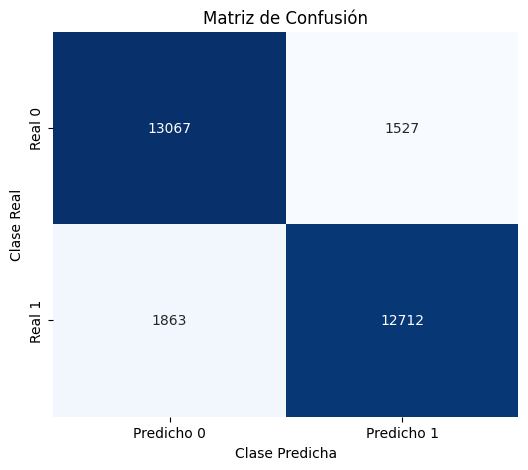

In [ ]:
conf_matrix_xg = confusion_matrix(y_new_test, y_pred_xg)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_xg, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicho 0', 'Predicho 1'], yticklabels=['Real 0', 'Real 1'])

plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()

El modelo tiene tiene alta cantidad en las predicciones correctas, y a comparación de los demás el margen de error es más pequeño. Por lo que se puede concluir que tiene un desempeño sobresaliente en la identificación de los clientes satisfechos e insatisfechos.

## **SVM**

In [ ]:
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),       
    ('svm', SVC(probability=True))
])
param_grid_svm = {
    'svm__C': [0.1, 1, 10, 100],        
    'svm__kernel': ['rbf','sigmoid'], 
    'svm__gamma': ['scale', 'auto'],             
}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_svm = GridSearchCV(estimator=pipeline_svm, param_grid=param_grid_svm, scoring='roc_auc', cv=stratified_kfold, n_jobs=-1)

grid_search_svm.fit(X_new_train, y_new_train)

print("Best parameters found: ", grid_search_svm.best_params_)

y_pred_svm = grid_search_svm.predict(x_new_test)
y_prob_svm = grid_search_svm.predict_proba(x_new_test)[:, 1]

scoretrainsvm = grid_search_svm.best_score_
test_auc_roc = roc_auc_score(y_new_test, y_prob_svm)


print("score conjunto de entremaniento:", scoretrainsvm)
print(f"AUC-ROC score on test set: {test_auc_roc}")

Best parameters found:  {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
score conjunto de entremaniento: 0.9273269842020369
AUC-ROC score on test set: 0.9141997498443285


In [47]:
with open('mejor_modelo_svm', 'wb') as file:
    pickle.dump(grid_search_svm, file)

In [49]:
tablalsvm = {
    '': ['SVM'],
    'Precisión': [
        precision_score(y_new_test, y_pred_svm, average='binary')
    ],
    'Recall': [
        recall_score(y_new_test, y_pred_svm, average='binary')
    ],
    'F1 Score': [
        f1_score(y_new_test, y_pred_svm, average='binary')
    ],
    'AUC': [
        roc_auc_score(y_new_test, y_prob_svm),  
    ]
}

tabla_modelsvm = pd.DataFrame(tablalsvm)
tabla_modelsvm

,,Precisión,Recall,F1 Score,AUC
0,SVM,0.866342,0.840961,0.853462,0.9142


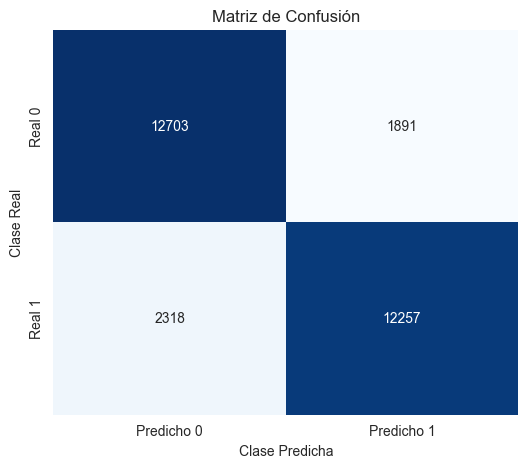

In [50]:
conf_matrix_svm = confusion_matrix(y_new_test, y_pred_svm)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicho 0', 'Predicho 1'], yticklabels=['Real 0', 'Real 1'])

plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()

La matriz de confusión para el modelo de SVM nos muestra que el modelo tiene un desempeño solido, ya que predijo correctamente para la clase 0 un total de 12703 al igual para la clase 1 con un total de 12257. Aunque presenta cierto margen de error, el modelo realiza un buen trabajo.

## **Tablas de Metricas**

In [52]:
datametricas = {
    "Modelo": [
        "K-NN", 
        "Clasificación bayesiana", 
        "Regresión Logística L1", 
        "Regresión Logística L2", 
        "Random Forest", 
        "XGBoost", 
        "SVM"
    ],
    "Precisión": [0.852974, 0.688863, 0.753786, 0.753871, 0.914397, 0.892759, 0.866342],
    "Recall": [0.778182, 0.726106, 0.765009, 0.76494, 0.787856, 0.872178, 0.840961],
    "F1 Score": [0.813863, 0.706994, 0.759356, 0.759365, 0.846423, 0.882349, 0.853462],
    "AUC": [0.889425, 0.763836, 0.795737, 0.79575, 0.940191, 0.950247, 0.9142]
}

dfmet = pd.DataFrame(datametricas)
dfmet


,Modelo,Precisión,Recall,F1 Score,AUC
0,K-NN,0.852974,0.778182,0.813863,0.889425
1,Clasificación bayesiana,0.688863,0.726106,0.706994,0.763836
2,Regresión Logística L1,0.753786,0.765009,0.759356,0.795737
3,Regresión Logística L2,0.753871,0.764940,0.759365,0.795750
4,Random Forest,0.914397,0.787856,0.846423,0.940191
5,XGBoost,0.892759,0.872178,0.882349,0.950247
6,SVM,0.866342,0.840961,0.853462,0.914200


Luego de realizar la tabla anterior, se puede analizar que el modelo XGBoost presenta el AUC más alto, y el modelo de clasificación bayesiana el más bajo. Random Forest y SVM también presentan buen desempeño con AUC altos.

## **Curvas ROC**

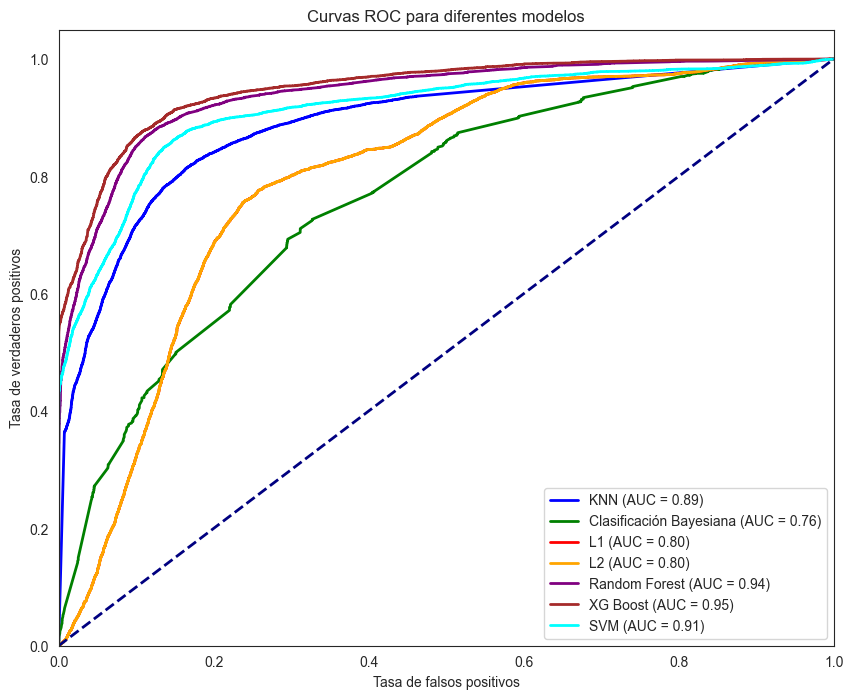

In [51]:
from sklearn.metrics import roc_curve, auc

fpr_knn, tpr_knn, _ = roc_curve(y_new_test, prob_knn)
fpr_cb, tpr_cb, _ = roc_curve(y_new_test, prob_cb)
fpr_lr, tpr_lr, _ = roc_curve(y_new_test, prob_lr)
fpr_prob, tpr_prob, _ = roc_curve(y_new_test, probabilities)
fpr_rf, tpr_rf, _ = roc_curve(y_new_test, probabilities_rf)
fpr_y_pred, tpr_y_pred, _ = roc_curve(y_new_test, y_pred_proba)
fpr_svm, tpr_svm, _ = roc_curve(y_new_test, y_prob_svm) 

roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_cb = auc(fpr_cb, tpr_cb)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_prob = auc(fpr_prob, tpr_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_y_pred = auc(fpr_y_pred, tpr_y_pred)
roc_auc_svm = auc(fpr_svm, tpr_svm) 


plt.figure(figsize=(10, 8))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_cb, tpr_cb, color='green', lw=2, label=f'Clasificación Bayesiana (AUC = {roc_auc_cb:.2f})')
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'L1 (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_prob, tpr_prob, color='orange', lw=2, label=f'L2 (AUC = {roc_auc_prob:.2f})')
plt.plot(fpr_rf, tpr_rf, color='purple', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_y_pred, tpr_y_pred, color='brown', lw=2, label=f'XG Boost (AUC = {roc_auc_y_pred:.2f})')
plt.plot(fpr_svm, tpr_svm, color='cyan', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})') 


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Configuración del gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curvas ROC para diferentes modelos')
plt.legend(loc="lower right")

# Mostrar el gráfico
plt.show()

## **Conclusión**

Tras analizar la tabla de métricas y la curva ROC, se concluye que el modelo más efectivo para este conjunto de datos es XGBoost, con un **AUC = 0.95**, lo que demuestra su excelente capacidad para discriminar entre las clases para este ejercicio. En contraste, el modelo de Clasificación Bayesiana, con el AUC más bajo (0.76), presentó el desempeño menos favorable, lo que sugiere que no es la opción más adecuada para este caso. 